# Unsupervised Learning Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We Team GM3, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA Movie Recommendation 2022

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.
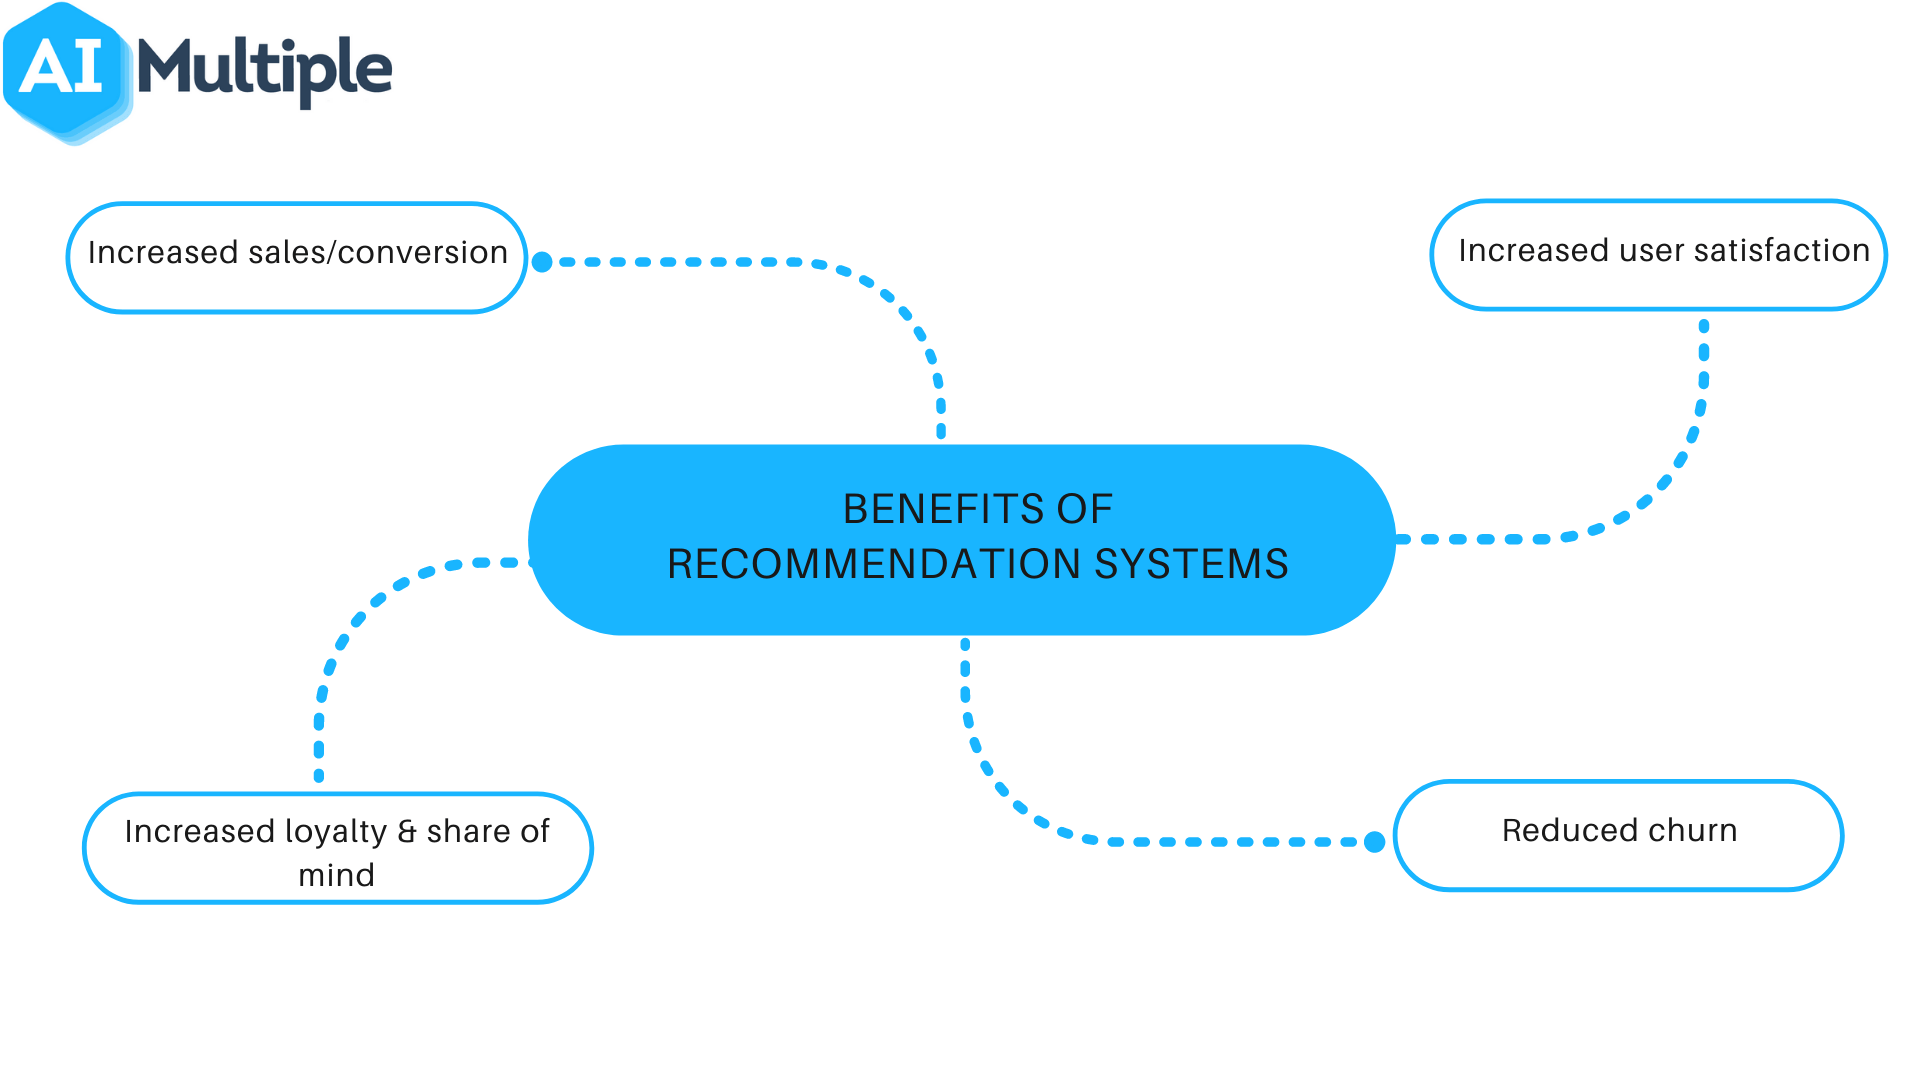


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Understand the Data</a>

<a href=#six>4. Exploratory Data Analysis (EDA)</a>

<a href=#seven>5. Data Engineering</a>

<a href=#eight>6. Model creation </a>

<a href=#nine>7. Model Improvements</a>

<a href=#ten>8. Model Evaluation</a>

<a href=#eleven>9. Discuss chosen methods logic</a>

<a href=#twelve>10. Conclusions</a>

<a href=#thirteen>11. Recommendations</a>

 <a id="one"></a>
## 1. Importing Packages
---  
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

# Comet

In [ ]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

In [163]:
!pip install missingno

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import missingno #Python library for the exploratory visualization of missing data #install using !pip install missingno
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


# Libraries for data preparation and model building

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to Load data files into a DataFrame. |

---

In [62]:
# reading in csv files
data2 = pd.read_csv('movies.csv')
data1 = pd.read_csv('imdb_data.csv')
data3 = pd.read_csv('tags.csv')
data4 = pd.read_csv('train.csv')

# using merge function by setting how='left'
df1 = pd.merge(data1, data2, on='movieId', how = 'left')
df2 = pd.merge(df1, data3, on='movieId', how = 'left')
df2

movies_df = pd.merge(df1, data4, on= 'movieId', how = 'left')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27278 entries, 0 to 27277
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
 6   title          24866 non-null  object 
 7   genres         24866 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.9+ MB


In [63]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9636765 entries, 0 to 9636764
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   movieId        int64  
 1   title_cast     object 
 2   director       object 
 3   runtime        float64
 4   budget         object 
 5   plot_keywords  object 
 6   title          object 
 7   genres         object 
 8   userId         float64
 9   rating         float64
 10  timestamp      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 882.3+ MB


In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907549 entries, 0 to 907548
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   movieId        907549 non-null  int64  
 1   title_cast     679596 non-null  object 
 2   director       680555 non-null  object 
 3   runtime        665649 non-null  float64
 4   budget         585546 non-null  object 
 5   plot_keywords  676820 non-null  object 
 6   title          905137 non-null  object 
 7   genres         905137 non-null  object 
 8   userId         903067 non-null  float64
 9   tag            903051 non-null  object 
 10  timestamp      903067 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 83.1+ MB


### --> Checking for missing values on df1

In [14]:
df1.isna().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
title             2412
genres            2412
dtype: int64

In [65]:
movies_df.isna().sum()

movieId                0
title_cast       2605501
director         2603702
runtime          2654627
budget           3155235
plot_keywords    2611483
title               2412
genres              2412
userId              3734
rating              3734
timestamp           3734
dtype: int64

In [51]:
df2.isna().sum()

movieId               0
title_cast       227953
director         226994
runtime          241900
budget           322003
plot_keywords    230729
title              2412
genres             2412
userId             4482
tag                4498
timestamp          4482
dtype: int64

<a id="three"></a>
# 3. Understand the Data

<a class="anchor" id="1.1"></a>

Text(0.5, 1.0, 'COLUMN WISE MISSING VALUES')

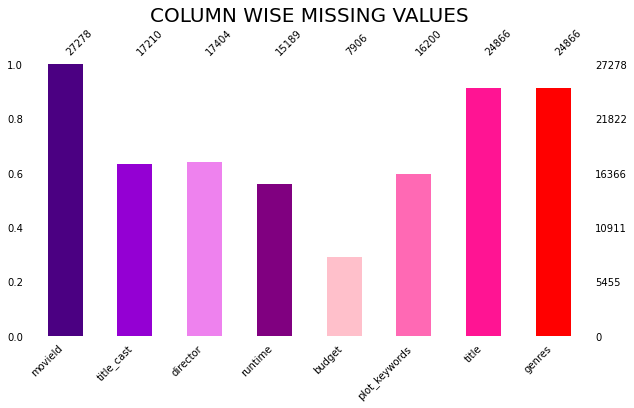

In [18]:
# Plot missing values in columns

color= ['indigo','darkviolet','violet','purple','pink','hotpink','deeppink','red']
missingno.bar(df1,fontsize=10,color=color,figsize=(10,5))
plt.title('COLUMN WISE MISSING VALUES',fontsize=20)

Text(0.5, 1.0, 'COLUMN WISE MISSING VALUES')

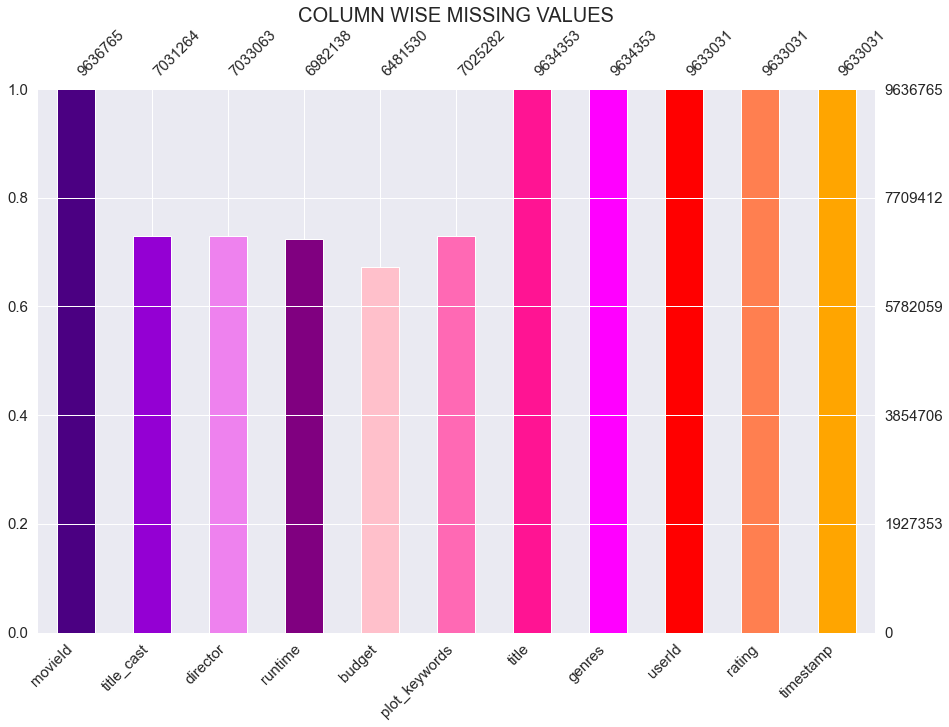

In [68]:
# Plot missing values in columns

color= ['indigo','darkviolet','violet','purple','pink','hotpink','deeppink','magenta','red', 'coral', 'orange']
missingno.bar(movies_df,fontsize=15,color=color,figsize=(15,10))
plt.title('COLUMN WISE MISSING VALUES',fontsize=20)

<a id="six"></a>
# 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
---  
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |
---

Looking at the first dataframe df1

In [27]:
df1

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,Jumanji (1995),Adventure|Children|Fantasy
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry,Grumpier Old Men (1995),Comedy|Romance
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...,...
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,NaN,man wrapped in a towel|man wears a thong|male ...,Kein Bund für's Leben (2007),Comedy
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,"DEM5,800,000",ski|ski resort|ampersand in title|drink in title,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,NaN,pirate|sword fight|korea|bandit,The Pirates (2014),Adventure
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,NaN,friend|friendship|television show|restaurant,Rentun Ruusu (2001),(no genres listed)


In [17]:
df1.duplicated().sum()

0

In [69]:
movies_df.duplicated().sum()

0

### --> Most Popular Genre

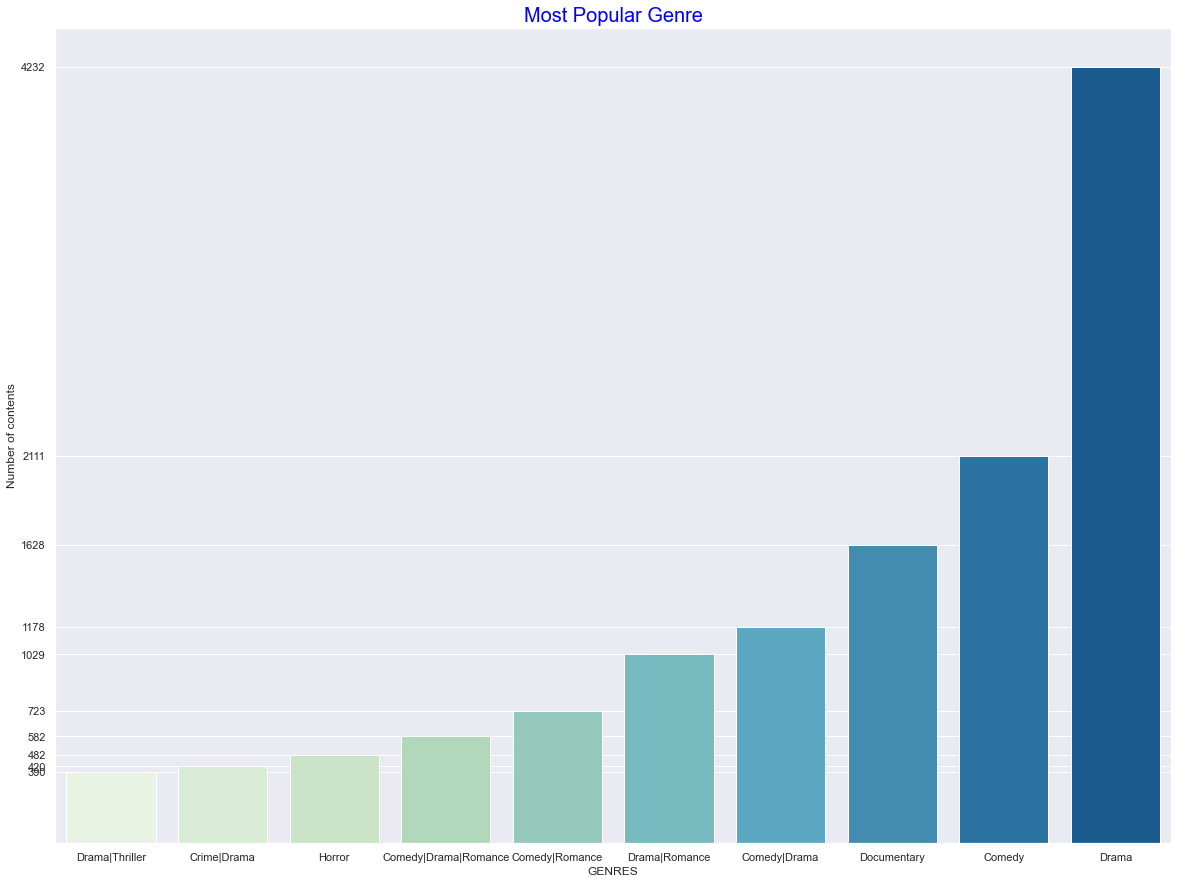

In [92]:
#MOVIE Genres
plt.figure(figsize=(20,15))
sb.barplot(x= df1.genres.value_counts()[:10].sort_values().index, y=df1.genres.value_counts()[:10].sort_values().values,palette='GnBu');
plt.title('Most Popular Genre', color='Blue', fontsize=20)
plt.yticks(df1.genres.value_counts()[:10].sort_values().values);
plt.xlabel('GENRES');
plt.ylabel('Number of contents');

### --> Top Actor/Actresses

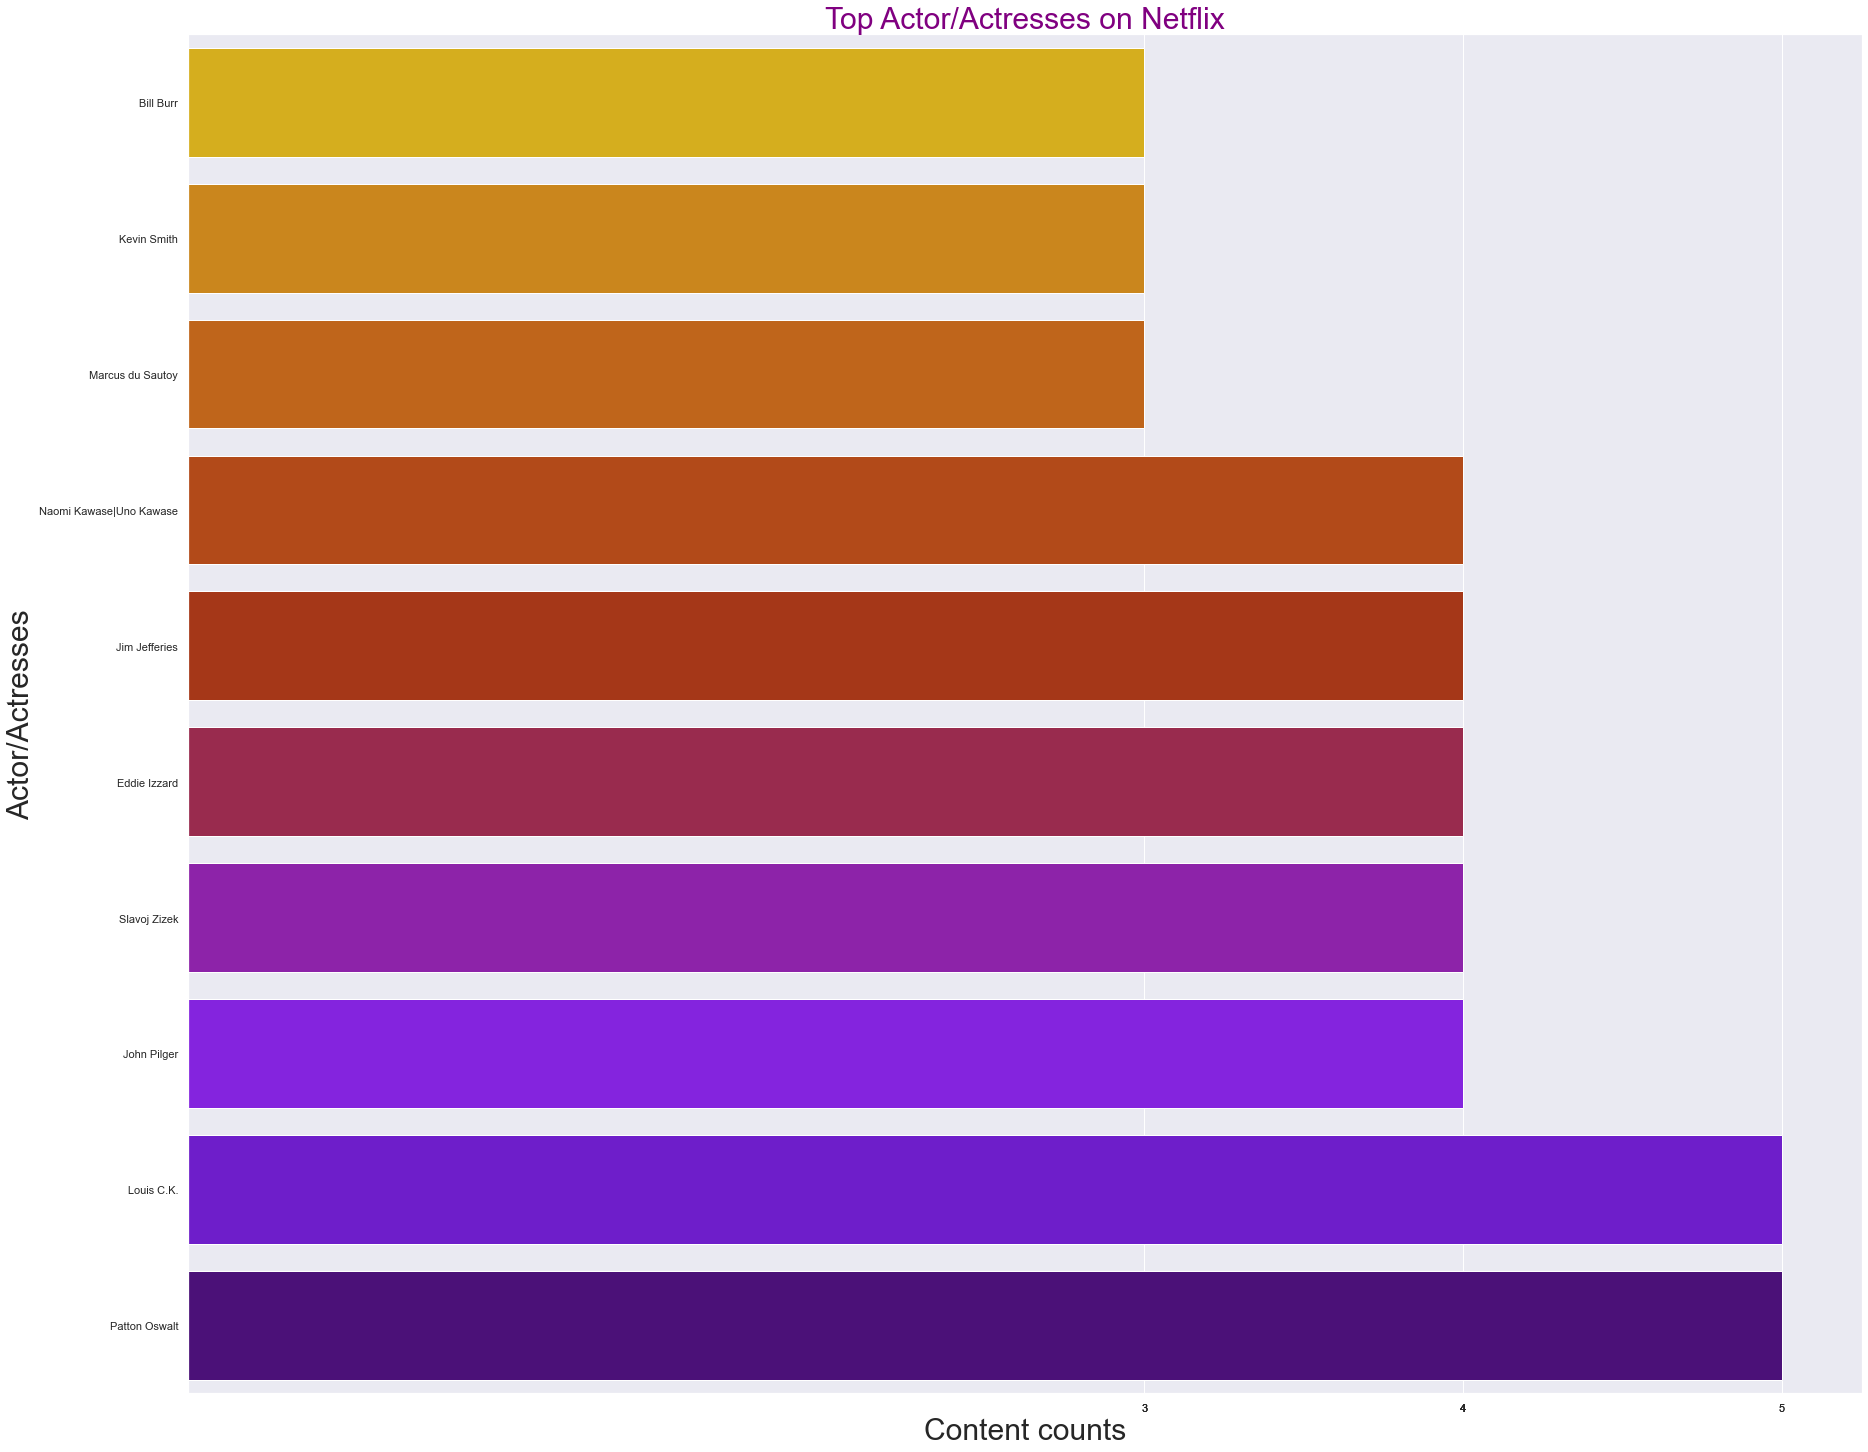

In [100]:
plt.figure(figsize=(30,25))
sb.barplot(y= df1.title_cast.value_counts()[:10].sort_values().index, x=df1.title_cast.value_counts()[:10].sort_values().values,palette='gnuplot_r');
plt.title('Top Actor/Actresses on Netflix', color='purple', fontsize=30)
plt.xticks(df1.title_cast.value_counts()[:10].sort_values().values);
plt.ylabel('Actor/Actresses', fontsize=30);
plt.xlabel('Content counts', fontsize=30);

Actors **'Patton Oswalt and Louis C.K'** have highest number of movies

<AxesSubplot:xlabel='rating', ylabel='count'>

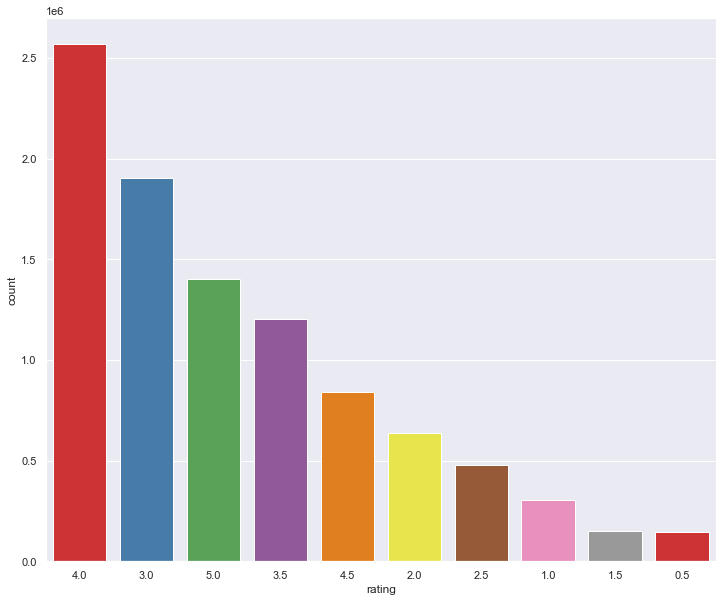

In [74]:
#MOVIE RATINGS
plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(x="rating", data= movies_df, palette="Set1", order=movies_df['rating'].value_counts().index[0:15])

Most movies are clearly rated at 4.0

In [30]:
df1['director'].value_counts()

See full summary       28
Woody Allen            26
Luc Besson             26
Stephen King           24
William Shakespeare    19
                       ..
Zac Stanford            1
Marc Caro               1
Megan Ambuhl Graner     1
Tahmineh Milani         1
Seong-il Cheon          1
Name: director, Length: 11786, dtype: int64

### --> Analysis of movie duration

<AxesSubplot:xlabel='runtime', ylabel='Density'>

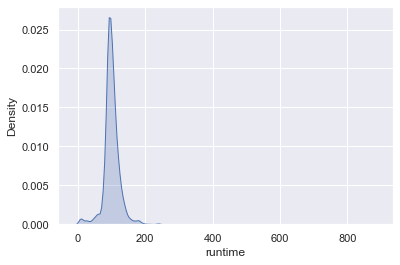

In [40]:
df1['runtime']
sb.set(style="darkgrid")
sb.kdeplot(data=df1['runtime'], shade=True)

### Longest Movie

In [105]:
df1.sort_values('runtime', ascending = False).head(1)

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres
25918,123288,Dakota Fanning|Matt Frewer|Emily Bergl|Heather...,Dakota Fanning,877.0,"$40,000,000",roswell new mexico|unidentified flying object|...,Taken (2002),Sci-Fi


### Shortest Movie

In [106]:
df1.sort_values('runtime', ascending = True).head(1)

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres
26190,125978,Laura Bayley|Dorothy Smith|Harold Smith,George Albert Smith,1.0,NaN,1890s|19th century|character name as title|san...,Santa Claus (1898),Sci-Fi


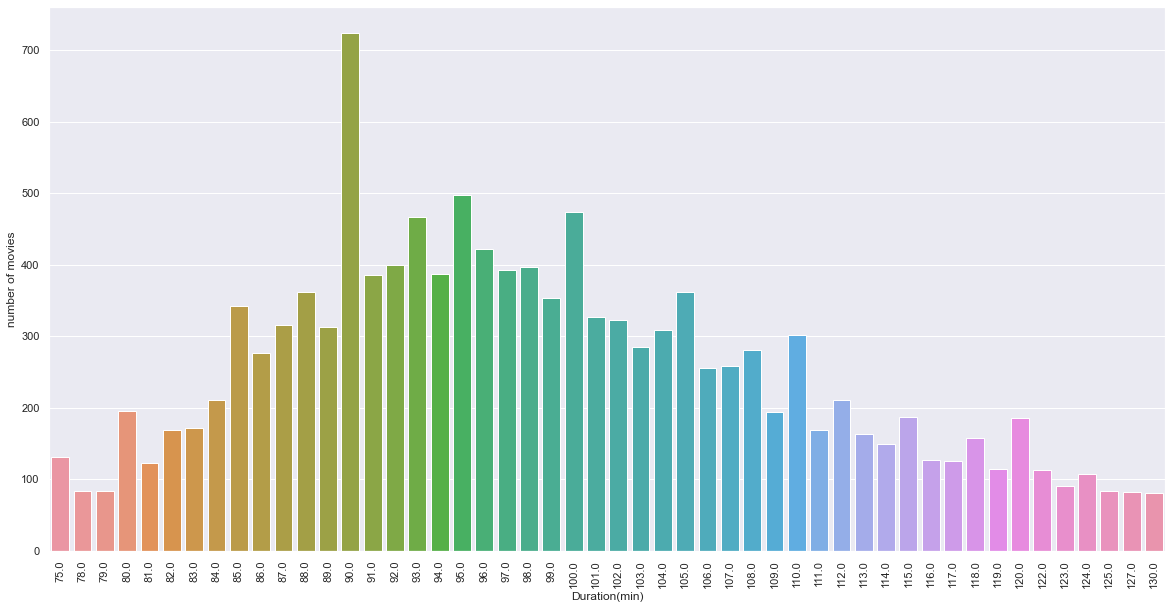

In [103]:
movie_time = df1['runtime'].value_counts().head(50)

plt.figure(figsize=(20, 10));
sb.barplot(x = movie_time.index, y = movie_time);
plt.xticks(rotation=90);
plt.ylabel('number of movies');
plt.xlabel ('Duration(min)');

- So, a good amount of movies have a **duration of 90 mins.**

### --> Directors with most number of Movies produced

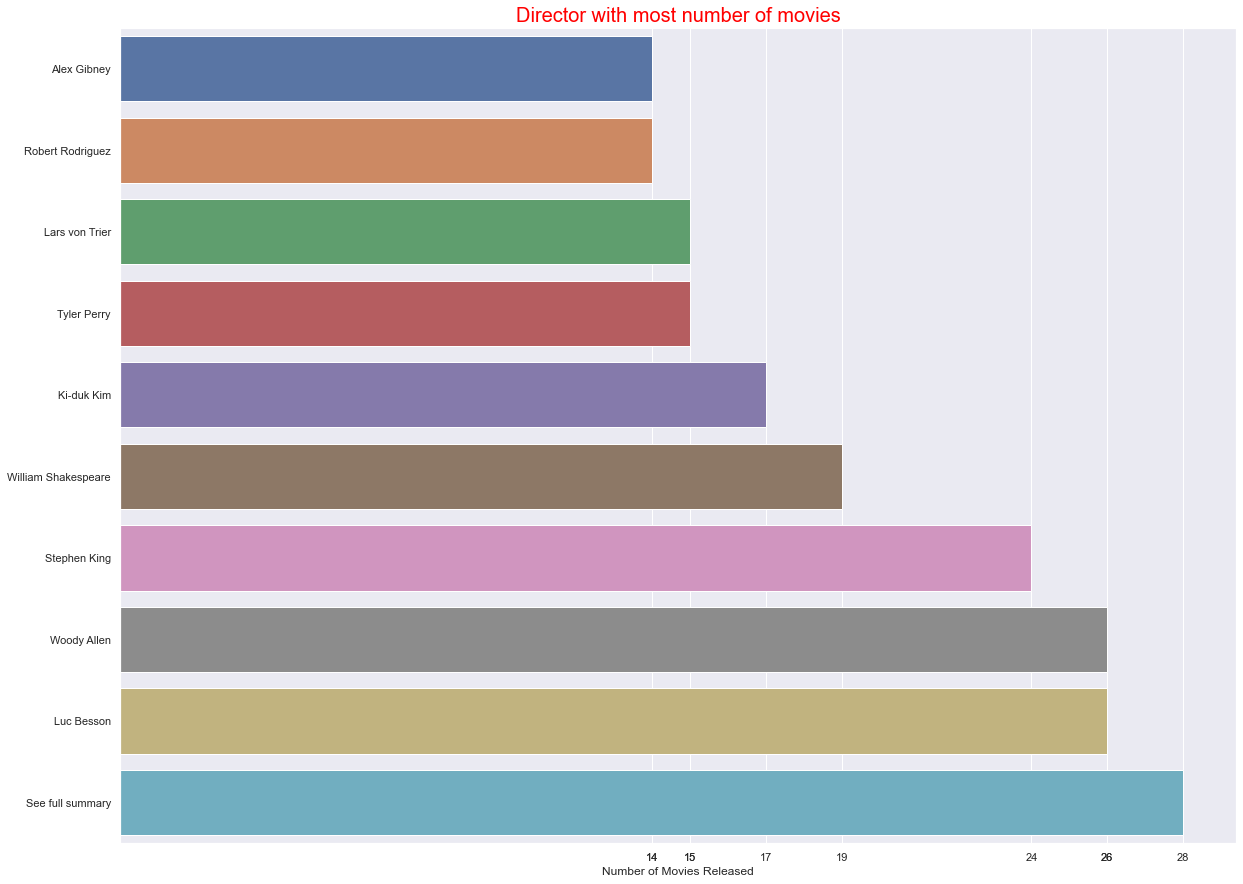

In [93]:
plt.figure(figsize=(20,15))
sb.barplot(y= df1.director.value_counts()[:10].sort_values().index, x=df1.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of movies', color='red', fontsize=20)
plt.xticks(df1.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Movies Released');

- Directors **Luc Besson and Woody Allen** released **highest number of Movies: 26**.

In [108]:
movies_df.groupby(by='title')['rating'].mean()

title
"Great Performances" Cats (1998)             2.753731
$ (Dollars) (1971)                           2.875000
$5 a Day (2008)                              3.125000
$9.99 (2008)                                 3.222222
$ellebrity (Sellebrity) (2012)               2.250000
                                               ...   
À nous la liberté (Freedom for Us) (1931)    3.746914
À propos de Nice (1930)                      3.200000
Árido Movie (2005)                           3.000000
Üvegtigris (2001)                            3.142857
貞子3D (2012)                                  2.562500
Name: rating, Length: 24856, dtype: float64

In [109]:
# Lets sort them and see which movie has the highest mean of ratings.

movies_df.groupby(by='title')['rating'].mean().sort_values(ascending=False)

title
Wrestling for Jesus: The Tale of T-Money (2011)    5.0
The... Beautiful Country (1977)                    5.0
Only Daughter (2013)                               5.0
Vasermil (2007)                                    5.0
Day the Universe Changed, The (1985)               5.0
                                                  ... 
Zero (2012)                                        NaN
Zero Degrees of Separation (2005)                  NaN
Zig Zag (1970)                                     NaN
alaskaLand (2013)                                  NaN
¡Qué hacer! (1970)                                 NaN
Name: rating, Length: 24856, dtype: float64

Looks like there are couple of movies which are highly rated! But hold on is it really worth it to watch them by just taking out the mean ?, My Answer would be Strictly NOOOO!!!!. If you would ask me why then bare with me for the answer.

##### Lets explore how many no. of people actually gave ratings to a specific movie.

In [110]:
movies_df.groupby(by='title')['rating'].count().sort_values(ascending=False)

title
Shawshank Redemption, The (1994)      32831
Forrest Gump (1994)                   32383
Pulp Fiction (1994)                   31697
Silence of the Lambs, The (1991)      29444
Matrix, The (1999)                    29014
                                      ...  
Gun the Man Down (1956)                   0
Versailles (2008)                         0
Lady of Chance, A (1928)                  0
Gunfight at Dodge City, The (1959)        0
Ciao Bella (2007)                         0
Name: rating, Length: 24856, dtype: int64

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.



Lets first create a dataframe and then would probably build a joint plot to know the relationships between the Mean Ratings and the number of people rated it.

In [112]:
movies_df.groupby(by='title')['rating'].mean()

title
"Great Performances" Cats (1998)             2.753731
$ (Dollars) (1971)                           2.875000
$5 a Day (2008)                              3.125000
$9.99 (2008)                                 3.222222
$ellebrity (Sellebrity) (2012)               2.250000
                                               ...   
À nous la liberté (Freedom for Us) (1931)    3.746914
À propos de Nice (1930)                      3.200000
Árido Movie (2005)                           3.000000
Üvegtigris (2001)                            3.142857
貞子3D (2012)                                  2.562500
Name: rating, Length: 24856, dtype: float64

In [114]:
New_data=pd.DataFrame(movies_df.groupby(by='title')['rating'].mean())
New_data.head()

,rating
title,
"""Great Performances"" Cats (1998)",2.753731
$ (Dollars) (1971),2.875000
$5 a Day (2008),3.125000
$9.99 (2008),3.222222
$ellebrity (Sellebrity) (2012),2.250000


Lets also add number of ratings into the dataframe along with its mean ratings.

In [122]:
New_data['No. of people Rated']= movies_df.groupby(by='title')['rating'].count()
New_data.head(n=10)

,rating,No. of people Rated
title,,
"""Great Performances"" Cats (1998)",2.753731,67
$ (Dollars) (1971),2.875000,16
$5 a Day (2008),3.125000,20
$9.99 (2008),3.222222,27
$ellebrity (Sellebrity) (2012),2.250000,2
'71 (2014),3.620438,137
'Hellboy': The Seeds of Creation (2004),2.864865,37
"'Human' Factor, The (Human Factor, The) (1975)",2.250000,2
'Neath the Arizona Skies (1934),2.500000,6


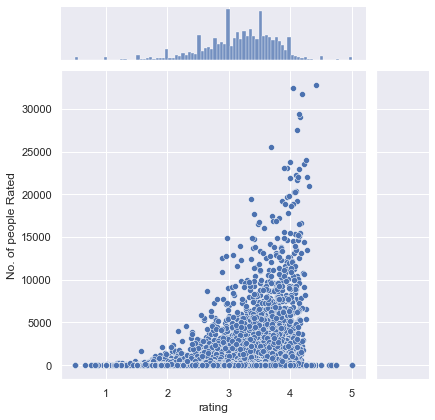

In [118]:
sns.jointplot(x=New_data['rating'],y=New_data['No. of people Rated']);

This clearly shows that the Movies with ratings in the range of 3 to 4.1 has the most number of ratings. Movies with almost 5 star ratings has around 10 or 20 number of ratings to it. Lets just plot a Densityplot to have a look at the dense regions.

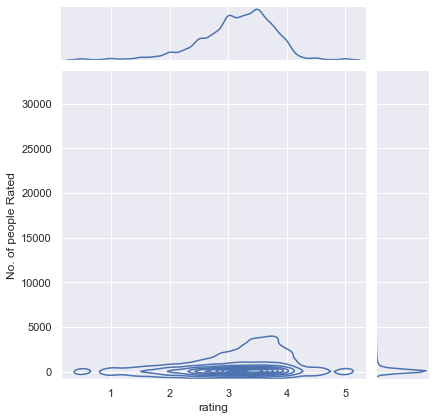

In [120]:
sns.jointplot(x=New_data['rating'],y=New_data['No. of people Rated'],kind='kde');

We can see the dark black zone in the plot which represent most no. of datapoints almost have 3 to 4 star ratings. Dark regions generally represent the Dense zones, which simply means alot of datapoints at that region.

#### Now let see the individual distributions of the features.

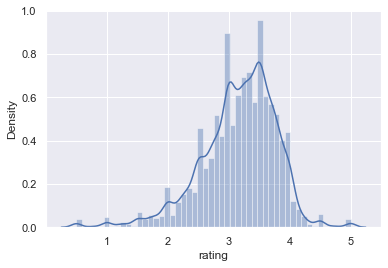

In [121]:
sns.distplot(New_data['rating']);

Ratings are negatively skewed

In [126]:
df1['Year'] = df1['title'].str.extract(r'(?!\()\b(\d+){1}')

In [127]:
df1

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,Year
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...,...,...,...,...,...
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,NaN,man wrapped in a towel|man wears a thong|male ...,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,"DEM5,800,000",ski|ski resort|ampersand in title|drink in title,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,NaN,pirate|sword fight|korea|bandit,The Pirates (2014),Adventure,2014
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,NaN,friend|friendship|television show|restaurant,Rentun Ruusu (2001),(no genres listed),2001


### ANALYSING THE CONTENT GROWTH OVER THE YEARS

In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27278 entries, 0 to 27277
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
 6   title          24866 non-null  object 
 7   genres         24866 non-null  object 
 8   Year           24854 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.1+ MB


In [138]:
df1['Year'] = df1['Year'].fillna(0)

In [139]:
df1['Year'] = df1['Year'].astype(int)

### --> Yearly Analysis of content

<AxesSubplot:xlabel='count', ylabel='Year'>

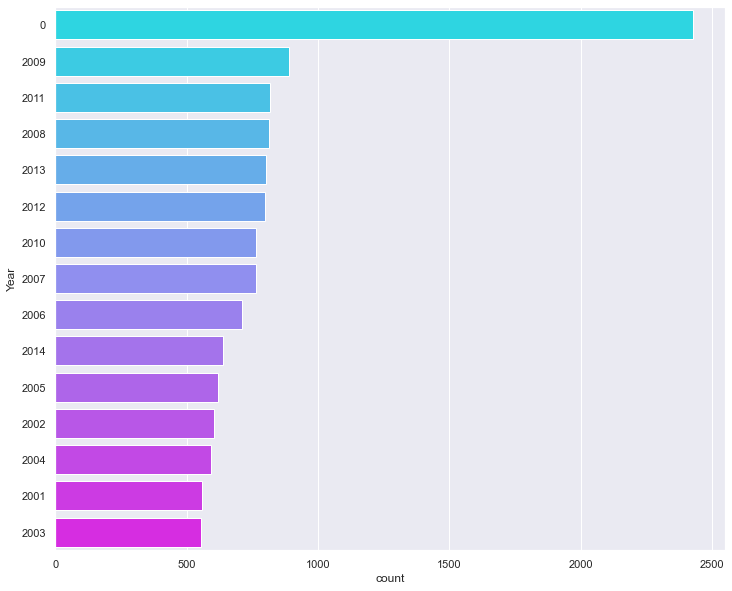

In [143]:
plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(y="Year", data= df1, palette="cool", order= df1['Year'].value_counts().index[0:15])

- We can see that most movies were released in year 2009.

<a id="seven"></a>
# 5. Feature Engineering
<a class="anchor" id="1.1"></a>
---
    
| ⚡ Description: Feature engineering ⚡ |
| :--------------------------- |
| In this section the data is processed further, creating new features - as identified in the EDA phase. |

<a id="eight"></a>
# 6. Model Creation
<a class="anchor" id="1.1"></a>
---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, models are created inorder to accurately recommend movies. |

---

<a id="nine"></a>
# 7.  Model Improvements
<a class="anchor" id="1.1"></a>

<a id="ten"></a>
# 8.  Model Evaluation
<a class="anchor" id="1.1"></a>

<a id="eleven"></a>
# 9. Discuss chosen methods logic
<a class="anchor" id="1.1"></a>

<a id="twelve"></a>
# 10. Conclusion
<a class="anchor" id="1.1"></a>

<a id="twelve"></a>
# 11. Recommendations
<a class="anchor" id="1.1"></a>